In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

def present(directory):
    final_dists = []
    boxes = []
    boxes_x = []
    references = []
    
    dmgid = 0
    for dmgdir in sorted(os.listdir(directory + "/iteresults")):
        boxes_x.append(dmgdir)
        dmgid += 1
        
        final_dists = []
        for subdir in os.listdir(directory + "/iteresults/" + dmgdir):
            
            if subdir != "ref.txt":
                x = np.loadtxt(directory + "/iteresults/" + dmgdir + "/" + subdir + "/best_aggregated_observations.dat")
                best_score = x[len(x)-1][1]
                final_dists.append(best_score)
        
        boxes.append(final_dists) 
        
        ref = np.loadtxt(directory + "/iteresults/" + dmgdir + "/ref.txt")
        references.append(ref)
        
    fig = plt.figure()
    axes = fig.add_axes([0.1,0.1,0.8,0.8])
    axes.boxplot(boxes)
    axes.set_ylim([0,5])
    colors = ['y', 'b', 'g']
    markers = ['^', 'o', 's']
    labels = ['tripod', 'hill climbing', 'stair climbing']
        
    for i in range(len(references)):
        for j in range(len(references[i])):
            if i == 0:
                axes.plot(i+1, references[i][j], label=labels[j], color=colors[j], marker=markers[j], markeredgecolor='k', markersize=5)
            else:
                axes.plot(i+1, references[i][j], color=colors[j], marker=markers[j], markeredgecolor='k', markersize=5)
    ticks = np.linspace(1, len(boxes), len(boxes))
    plt.ylabel("max covered meters in 5s")
    plt.xticks(ticks, boxes_x)
    # plt.xlabel("damage type")
    plt.grid(axis='y')
    plt.axvline(x=8.5, color='k', linestyle='--')

    plt.savefig(directory + "/plots/maxscore.pdf")
    plt.legend()
    plt.show()

/home/aran/.local/lib/python3.5/site-packages/ipykernel_launcher.py:26: UserWarning: loadtxt: Empty input file: "dc2307/iteresults/e3/ref.txt"
/home/aran/.local/lib/python3.5/site-packages/ipykernel_launcher.py:26: UserWarning: loadtxt: Empty input file: "dc2307/iteresults/e4/ref.txt"


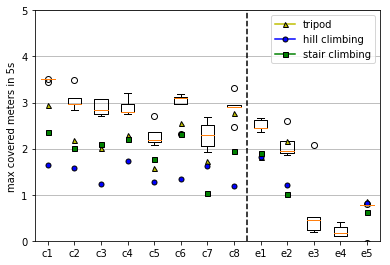

In [5]:
present("dc2307")